Ref: https://github.com/FelippeVelosoMarinho/RNA_Praticas_UFMG/blob/main/ASL_Classifier/V_librasTest%20(1).ipynb

https://www.youtube.com/watch?v=0lvHURoyhtc

Dataset teste: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset

### Criando venv no notebook
```
python -m venv tf_env
source tf_env/bin/activate  # No Linux/Mac
tf_env\Scripts\activate   # No Windows (CMD)

pip install -r requirements.txt

pip install ipykernel
python -m ipykernel install --user --name=tf_env --display-name "TensorFlow Clean (venv)"
```

Depois selecione sua versão de kernel

O primeiro passo é realizar o pré-processamento das imagens utilizadas. O tensorflow usa o formato típico 

In [3]:
# Grid de Images
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 20, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

In [5]:
import glob 
import os

current_dir = os.path.abspath(os.getcwd())

print(current_dir)

DIR = r"c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\data\train\PetImages"
DOG_DIR = r"\Dog"
CAT_DIR = r"\Cat"

dog_img_files = glob.glob(DIR + DOG_DIR + '/*') 
cat_img_files = glob.glob(DIR + CAT_DIR + '/*') 
print(f"Arquivos na pasta: {len(dog_img_files)}")
print(dog_img_files[:5])

c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\notebooks
Arquivos na pasta: 12499
['c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\ActiveSemisupervisedLearningCNN-s\\data\\train\\PetImages\\Dog\\0.jpg', 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\ActiveSemisupervisedLearningCNN-s\\data\\train\\PetImages\\Dog\\1.jpg', 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\ActiveSemisupervisedLearningCNN-s\\data\\train\\PetImages\\Dog\\10.jpg', 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\ActiveSemisupervisedLearningCNN-s\\data\\train\\PetImages\\Dog\\100.jpg', 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\ActiveSemisupervisedLearningCNN-s\\data\\train\\PetImages\\Dog\\1000.jpg']


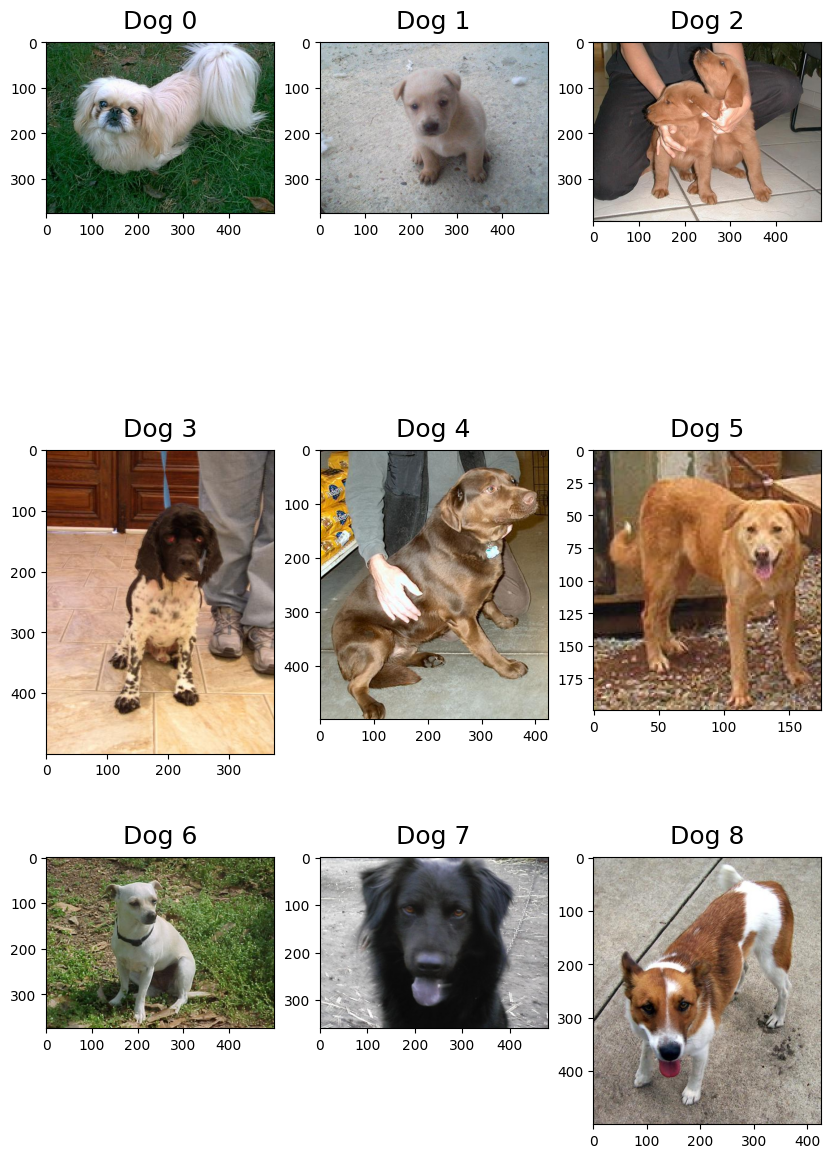

In [7]:
import random 
import cv2

random_dog_imgs = [cv2.imread(img_file) for img_file in random.sample(dog_img_files, 9)] # sorteia 9 imagens aleatórias da lista de cachorros
random_dog_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in random_dog_imgs]

titles = ['Dog ' + str(i) for i in range(9)]
showMultipleImages(random_dog_imgs, titles, (10, 15), 3, 3)

## Converter base de dados para treino, validação e teste

In [8]:
from PIL import Image
from pathlib import Path
import os
import glob # Mantenha glob se precisar de padrões complexos, mas Pathlib é preferível

# ⚠️ É crucial garantir que os caminhos sejam definidos corretamente
# Assumindo que DIR é um objeto Pathlib (ex: DIR = Path("c:/caminho/para/data/train/PetImages"))

def filter_valid_images(filepaths: list) -> list:
    """
    Verifica a validade de uma lista de caminhos de arquivos de imagem.
    Adiciona uma verificação inicial de tamanho zero.
    """
    valid_files = []
    corrupted_count = 0
    
    for i, fp in enumerate(filepaths):
        fp_str = str(fp) # Garante que está lidando com string, se 'fp' for um objeto Path
        
        # Otimização 1: Pula arquivos de tamanho zero (frequentemente corrompidos)
        if os.path.getsize(fp_str) == 0:
            corrupted_count += 1
            if i % 500 == 0:
                print(f"❌ Corrompido (tamanho zero): {fp_str}")
            continue
            
        try:
            with Image.open(fp_str) as im:
                im.verify()  # Verifica a integridade do cabeçalho
                # Opcional, mas mais completa: im.transpose(Image.FLIP_LEFT_RIGHT)
                # Tenta carregar os dados se 'im.verify()' não for suficiente.
            valid_files.append(fp)
        except Exception as e:
            # Otimização 2: Log mais claro
            corrupted_count += 1
            if corrupted_count % 500 == 0:
                 # Mostra o erro exato para diagnóstico
                print(f"❌ Corrompido (PIL Error: {e.__class__.__name__}): {fp_str}") 
                
    print(f"\n✅ Concluído. {len(valid_files)} arquivos válidos | {corrupted_count} arquivos corrompidos.")
    return valid_files

In [9]:
from pathlib import Path


DIR = Path(r"c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\data\train\PetImages") 
CAT_DIR = DIR / "Cat"
DOG_DIR = DIR / "Dog"

print("Iniciando a busca de arquivos...")

cat_paths = list(CAT_DIR.rglob("*.jpg")) # rglob faz a busca recursiva
dog_paths = list(DOG_DIR.rglob("*.jpg"))

cat_files = sorted(cat_paths)
dog_files = sorted(dog_paths)

print(f"\nArquivos brutos: Gatos: {len(cat_files):,} | Cachorros: {len(dog_files):,}")
print("--- Iniciando filtragem de imagens corrompidas ---")

# 3. Filtragem
cat_files_valid = filter_valid_images(cat_files)
dog_files_valid = filter_valid_images(dog_files)

# 4. Resultado Final
print("\n" + "="*50)
print(f"Resultado Final: \n")
print(f"✅ Gatos Válidos: {len(cat_files_valid):,} (Pulados: {len(cat_files) - len(cat_files_valid):,})")
print(f"✅ Cachorros Válidos: {len(dog_files_valid):,} (Pulados: {len(dog_files) - len(dog_files_valid):,})")
print(f"✅ TOTAL VÁLIDO: {len(cat_files_valid) + len(dog_files_valid):,}")
print("="*50)

Iniciando a busca de arquivos...

Arquivos brutos: Gatos: 12,499 | Cachorros: 12,499
--- Iniciando filtragem de imagens corrompidas ---

✅ Concluído. 12499 arquivos válidos | 0 arquivos corrompidos.


c:\Users\felip\OneDrive\Documentos\GitHub\ActiveSemisupervisedLearningCNN-s\tf_env\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))



✅ Concluído. 12499 arquivos válidos | 0 arquivos corrompidos.

Resultado Final: 

✅ Gatos Válidos: 12,499 (Pulados: 0)
✅ Cachorros Válidos: 12,499 (Pulados: 0)
✅ TOTAL VÁLIDO: 24,998


In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from pathlib import Path
import shutil
import os

labels_cat = [0] * len(cat_files) # 0 = Cat
labels_dog = [1] * len(dog_files) # 1 = Dog

y = np.array(labels_cat + labels_dog)

# Suas variáveis X e y
X = np.array(cat_files + dog_files)
y = np.array(labels_cat + labels_dog)

# 1. Separação TESTE (20% do TOTAL)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# X_temp e y_temp agora contêm 80% dos dados (Treino + Validação)

# 2. Separação VALIDAÇÃO (10% do TOTAL, que é 12.5% dos 80% restantes)
# Cálculo: 0.10 (val) / 0.80 (temp) = 0.125
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)

print(f"Total de dados: {len(X):,}")
print(f"  - Treino (70%): {len(X_train):,}")
print(f"  - Validação (10%): {len(X_val):,}")
print(f"  - Teste (20%): {len(X_test):,}")
print("-" * 30)
print(f"Distribuição de classes (Teste): {y_test.mean():.4f}")

Total de dados: 24,998
  - Treino (70%): 17,498
  - Validação (10%): 2,500
  - Teste (20%): 5,000
------------------------------
Distribuição de classes (Teste): 0.5000


In [30]:
import tensorflow as tf
import os
from pathlib import Path
from PIL import Image
import shutil

# MOvendo os arquivos para as pastas corretamente
BASE_SPLIT_DIR = Path("../data")
BASE_SPLIT_DIR.mkdir(exist_ok=True)

DEST_DIRS = {
    'train': BASE_SPLIT_DIR / 'train',
    'validation': BASE_SPLIT_DIR / 'validation',
    'test': BASE_SPLIT_DIR / 'test'
}
# Inicializa e cria as subpastas 'Cat' e 'Dog' em cada destino
for key, dest_dir in DEST_DIRS.items():
    (dest_dir / 'Cat').mkdir(parents=True, exist_ok=True)
    (dest_dir / 'Dog').mkdir(parents=True, exist_ok=True)


def move_files(file_list, dest_key):
    dest_path = DEST_DIRS[dest_key]
    for file_path_str in file_list:
        file_path = Path(file_path_str)
        
        class_name = file_path.parent.name 

        final_dest = dest_path / class_name / file_path.name
        
        shutil.copy(file_path, final_dest)
        
    print(f"✅ Arquivos de {dest_key} movidos: {len(file_list):,}")


move_files(X_train, 'train')
move_files(X_val, 'validation')
move_files(X_test, 'test')

✅ Arquivos de train movidos: 17,498
✅ Arquivos de validation movidos: 2,500
✅ Arquivos de test movidos: 5,000


In [31]:
def identify_corrupted_tf(file_path):
    """Tenta ler e decodificar a imagem usando rotinas do TensorFlow."""
    try:
        img_bytes = tf.io.read_file(str(file_path))
        
        _ = tf.image.decode_jpeg(img_bytes, channels=3)
        return False  # Não corrompido
    except Exception:
        return True   # Corrompido

def safer_purge(base_dir: Path):
    """Percorre o diretório e remove arquivos que o TensorFlow não consegue decodificar."""
    corrupted_files = []
    
    print(f"\n--- Verificando em: {base_dir.name} ---")
    
    for fp in base_dir.rglob("*.jpg"):
        if identify_corrupted_tf(fp):
            corrupted_files.append(fp)

    if corrupted_files:
        print(f"🗑️ Removendo {len(corrupted_files)} arquivos corrompidos...")
        for fp in corrupted_files:
            try:
                os.remove(fp)
                print(f"   Removido: {fp.name}")
            except Exception as e:
                print(f"   Erro ao remover {fp.name}: {e}")
                
    print(f"✅ Limpeza concluída em {base_dir.name}. Total removido: {len(corrupted_files):,}")


# Executa a limpeza segura
for folder_name in ['train', 'validation', 'test']:
    folder_path = BASE_SPLIT_DIR / folder_name
    safer_purge(folder_path)

print("\n--- LIMPEZA FINALIZADA. Os datasets estão prontos para o Keras. ---")


--- Verificando em: train ---
🗑️ Removendo 298 arquivos corrompidos...
   Removido: 10073.jpg
   Removido: 10404.jpg
   Removido: 11083.jpg
   Removido: 11086.jpg
   Removido: 1151.jpg
   Removido: 11729.jpg
   Removido: 12080.jpg
   Removido: 12269.jpg
   Removido: 1267.jpg
   Removido: 1914.jpg
   Removido: 1937.jpg
   Removido: 2742.jpg
   Removido: 3197.jpg
   Removido: 3710.jpg
   Removido: 391.jpg
   Removido: 3967.jpg
   Removido: 4000.jpg
   Removido: 4293.jpg
   Removido: 4322.jpg
   Removido: 4334.jpg
   Removido: 4351.jpg
   Removido: 445.jpg
   Removido: 4629.jpg
   Removido: 4750.jpg
   Removido: 4929.jpg
   Removido: 5077.jpg
   Removido: 5370.jpg
   Removido: 5819.jpg
   Removido: 6376.jpg
   Removido: 6435.jpg
   Removido: 6491.jpg
   Removido: 6768.jpg
   Removido: 6900.jpg
   Removido: 6906.jpg
   Removido: 6980.jpg
   Removido: 7003.jpg
   Removido: 7502.jpg
   Removido: 7642.jpg
   Removido: 7647.jpg
   Removido: 8183.jpg
   Removido: 8295.jpg
   Removido: 8415.jpg

## Carregagndo as imagens no TensorFlow

In [32]:
import tensorflow as tf

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.20.0
[]


In [33]:
from tensorflow.keras.utils import image_dataset_from_directory

train_folder = BASE_SPLIT_DIR / 'train'
validation_folder = BASE_SPLIT_DIR / 'validation'
test_folder = BASE_SPLIT_DIR / 'test'

train_dataset = image_dataset_from_directory(train_folder,
                                             image_size=(180, 180),
                                             batch_size=32,
                                             color_mode='rgb')

validation_dataset = image_dataset_from_directory(validation_folder,
                                                  image_size=(180, 180),
                                                  batch_size=32,
                                                  color_mode='rgb')

test_dataset = image_dataset_from_directory(test_folder,
                                            image_size=(180, 180),
                                            batch_size=32,color_mode='rgb',
                                            shuffle=False # n embaralha o teste
                                            )
                                            

Found 48377 files belonging to 4 classes.
Found 2481 files belonging to 2 classes.
Found 5927 files belonging to 3 classes.


In [34]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    print(data_batch[0].shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
(180, 180, 3)


## Treinando o modelo

No exemplo abaixo é usado a api sequencial. Seria uma versão mais pra aprendizado do que a funcional (pesquisar depois)



In [35]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Rescaling

model = keras.Sequential() # iniciando a api sequencial vazia
model.add(Rescaling(scale=1.0/255)) # adicionando camada de normalização (representamos cada cor em valores entre 0 e 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')) # primeira camada de conv (caminha pela imagem 32 vezes gerando a imagem de borda)
model.add(MaxPooling2D(pool_size=(2, 2))) # operação das imagens de borda que diminui a sobrecarga de info
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid")) # um neurônio de classificação sigmoid (um perceptron simples)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        filepath="model2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
 722/1512 ━━━━━━━━━━━━━━━━━━━━ 4:57 377ms/step - accuracy: 0.1835 - loss: -91107626140.1686

## Visualização dos resultados

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Treino acc")
plt.plot(epochs, val_accuracy, "b", label="Val acc")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Acurácia de Treino e Validação")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Treino loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Loss de Treino e Validação")
plt.legend()
plt.show()